# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

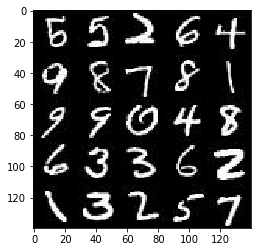

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

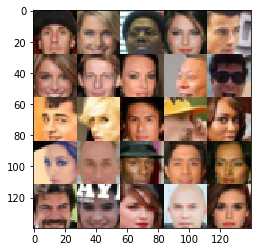

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    # Initialize the data, Steven Lian
    
    real_image_input = tf.placeholder(tf.float32, shape=[None, image_height, image_width, image_channels], name="real_input")
    data_z = tf.placeholder(tf.float32, shape=[None, z_dim], name="data_z")
    learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")

    return real_image_input, data_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    #Using the leaky ReLU, Steven Lian
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        # Leaky ReLU
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
    
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    # simialr things with samle DCGAN, Steven Lian
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
        x1 = tf.layers.dense(z, 7*7*512)

        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.5)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.5)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.5)

        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
       
        out = tf.tanh(logits) 
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Get the model, Steven Lian
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    # The total loss, Steven Lian
    d_loss = d_loss_real + d_loss_fake
    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # model_opt, Steven Lian
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    # Steven Lian
    images_count, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
   
    
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                # train steps, Steven Lian
                steps += 1
              
                batch_images = batch_images*2
                               
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % 10 == 0:
                    # Get the losses and print them out after each 10 steps
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.9655... Generator Loss: 0.3089
Epoch 1/2... Discriminator Loss: 0.9142... Generator Loss: 2.2324
Epoch 1/2... Discriminator Loss: 0.5121... Generator Loss: 5.1341
Epoch 1/2... Discriminator Loss: 1.3408... Generator Loss: 0.8686
Epoch 1/2... Discriminator Loss: 0.7484... Generator Loss: 1.9937
Epoch 1/2... Discriminator Loss: 1.0802... Generator Loss: 2.2366
Epoch 1/2... Discriminator Loss: 1.6367... Generator Loss: 0.4794
Epoch 1/2... Discriminator Loss: 1.0856... Generator Loss: 1.0104
Epoch 1/2... Discriminator Loss: 1.3051... Generator Loss: 0.6952
Epoch 1/2... Discriminator Loss: 1.1364... Generator Loss: 1.0702


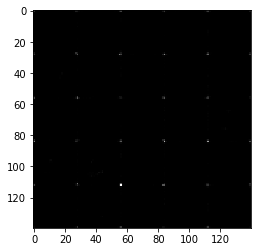

Epoch 1/2... Discriminator Loss: 0.9505... Generator Loss: 1.6975
Epoch 1/2... Discriminator Loss: 0.9282... Generator Loss: 1.1604
Epoch 1/2... Discriminator Loss: 0.9355... Generator Loss: 1.2858
Epoch 1/2... Discriminator Loss: 0.7959... Generator Loss: 1.7791
Epoch 1/2... Discriminator Loss: 0.6701... Generator Loss: 1.8563
Epoch 1/2... Discriminator Loss: 1.0572... Generator Loss: 0.7969
Epoch 1/2... Discriminator Loss: 0.9446... Generator Loss: 0.9553
Epoch 1/2... Discriminator Loss: 1.6543... Generator Loss: 0.4956
Epoch 1/2... Discriminator Loss: 1.0963... Generator Loss: 0.8689
Epoch 1/2... Discriminator Loss: 1.1954... Generator Loss: 1.0673


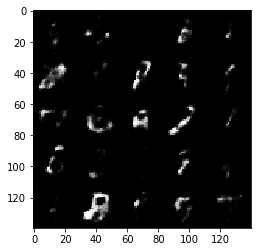

Epoch 1/2... Discriminator Loss: 1.1075... Generator Loss: 1.8470
Epoch 1/2... Discriminator Loss: 1.3600... Generator Loss: 2.0490
Epoch 1/2... Discriminator Loss: 1.2589... Generator Loss: 0.6426
Epoch 1/2... Discriminator Loss: 1.0561... Generator Loss: 1.0584
Epoch 1/2... Discriminator Loss: 1.2524... Generator Loss: 1.1266
Epoch 1/2... Discriminator Loss: 1.4139... Generator Loss: 0.5252
Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 0.9939
Epoch 1/2... Discriminator Loss: 1.2315... Generator Loss: 0.8955
Epoch 1/2... Discriminator Loss: 1.2010... Generator Loss: 0.7986
Epoch 1/2... Discriminator Loss: 1.1922... Generator Loss: 1.5810


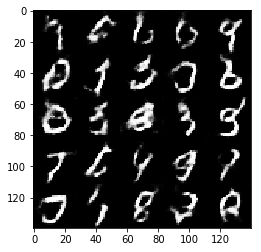

Epoch 1/2... Discriminator Loss: 1.1914... Generator Loss: 1.4702
Epoch 1/2... Discriminator Loss: 1.1389... Generator Loss: 0.9935
Epoch 1/2... Discriminator Loss: 1.1684... Generator Loss: 1.5068
Epoch 1/2... Discriminator Loss: 1.3169... Generator Loss: 1.8591
Epoch 1/2... Discriminator Loss: 1.1392... Generator Loss: 0.9340
Epoch 1/2... Discriminator Loss: 1.0691... Generator Loss: 1.1427
Epoch 1/2... Discriminator Loss: 1.1528... Generator Loss: 0.7869
Epoch 1/2... Discriminator Loss: 1.2172... Generator Loss: 0.6938
Epoch 1/2... Discriminator Loss: 0.9827... Generator Loss: 1.1718
Epoch 1/2... Discriminator Loss: 0.9780... Generator Loss: 1.3707


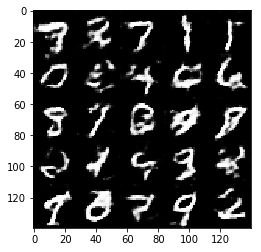

Epoch 1/2... Discriminator Loss: 1.0725... Generator Loss: 0.8820
Epoch 1/2... Discriminator Loss: 1.0689... Generator Loss: 1.6245
Epoch 1/2... Discriminator Loss: 1.2313... Generator Loss: 0.8075
Epoch 1/2... Discriminator Loss: 1.0149... Generator Loss: 1.3544
Epoch 1/2... Discriminator Loss: 1.0336... Generator Loss: 1.1239
Epoch 1/2... Discriminator Loss: 1.0101... Generator Loss: 1.5424
Epoch 2/2... Discriminator Loss: 1.2319... Generator Loss: 0.6451
Epoch 2/2... Discriminator Loss: 1.2506... Generator Loss: 0.6614
Epoch 2/2... Discriminator Loss: 1.0744... Generator Loss: 1.2386
Epoch 2/2... Discriminator Loss: 1.5615... Generator Loss: 0.4357


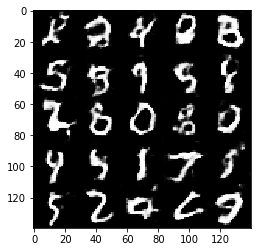

Epoch 2/2... Discriminator Loss: 0.9513... Generator Loss: 1.3780
Epoch 2/2... Discriminator Loss: 0.9810... Generator Loss: 0.9555
Epoch 2/2... Discriminator Loss: 1.3208... Generator Loss: 2.3044
Epoch 2/2... Discriminator Loss: 0.9403... Generator Loss: 1.4002
Epoch 2/2... Discriminator Loss: 1.0504... Generator Loss: 1.1895
Epoch 2/2... Discriminator Loss: 1.5456... Generator Loss: 2.5385
Epoch 2/2... Discriminator Loss: 1.1547... Generator Loss: 0.8256
Epoch 2/2... Discriminator Loss: 0.9800... Generator Loss: 1.0325
Epoch 2/2... Discriminator Loss: 1.0079... Generator Loss: 1.2275
Epoch 2/2... Discriminator Loss: 0.9766... Generator Loss: 1.3741


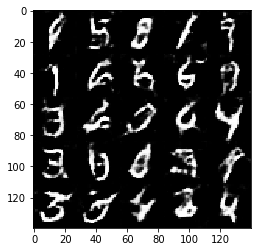

Epoch 2/2... Discriminator Loss: 1.1098... Generator Loss: 0.7493
Epoch 2/2... Discriminator Loss: 0.8936... Generator Loss: 1.3742
Epoch 2/2... Discriminator Loss: 0.8720... Generator Loss: 1.5471
Epoch 2/2... Discriminator Loss: 1.7211... Generator Loss: 0.3664
Epoch 2/2... Discriminator Loss: 1.0500... Generator Loss: 1.1343
Epoch 2/2... Discriminator Loss: 0.9901... Generator Loss: 0.9085
Epoch 2/2... Discriminator Loss: 1.0493... Generator Loss: 1.6778
Epoch 2/2... Discriminator Loss: 0.9099... Generator Loss: 1.4943
Epoch 2/2... Discriminator Loss: 0.9220... Generator Loss: 1.9228
Epoch 2/2... Discriminator Loss: 1.1719... Generator Loss: 2.0064


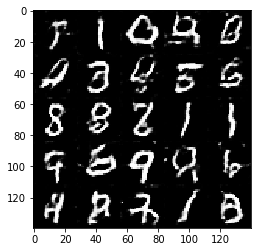

Epoch 2/2... Discriminator Loss: 0.9008... Generator Loss: 1.4836
Epoch 2/2... Discriminator Loss: 1.0920... Generator Loss: 0.8750
Epoch 2/2... Discriminator Loss: 0.9016... Generator Loss: 1.4950
Epoch 2/2... Discriminator Loss: 0.9502... Generator Loss: 1.1656
Epoch 2/2... Discriminator Loss: 1.0442... Generator Loss: 0.8581
Epoch 2/2... Discriminator Loss: 0.8755... Generator Loss: 1.1878
Epoch 2/2... Discriminator Loss: 1.2676... Generator Loss: 0.7034
Epoch 2/2... Discriminator Loss: 1.0417... Generator Loss: 2.1072
Epoch 2/2... Discriminator Loss: 0.8272... Generator Loss: 1.1221
Epoch 2/2... Discriminator Loss: 1.0556... Generator Loss: 0.8687


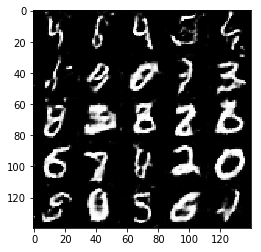

Epoch 2/2... Discriminator Loss: 0.8270... Generator Loss: 2.0188
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 0.9872
Epoch 2/2... Discriminator Loss: 1.1429... Generator Loss: 1.0951
Epoch 2/2... Discriminator Loss: 1.3001... Generator Loss: 2.9062
Epoch 2/2... Discriminator Loss: 1.0484... Generator Loss: 1.4684
Epoch 2/2... Discriminator Loss: 0.8658... Generator Loss: 1.4950
Epoch 2/2... Discriminator Loss: 1.0573... Generator Loss: 2.7197
Epoch 2/2... Discriminator Loss: 0.9831... Generator Loss: 0.8889
Epoch 2/2... Discriminator Loss: 0.8834... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 1.0853... Generator Loss: 1.5566


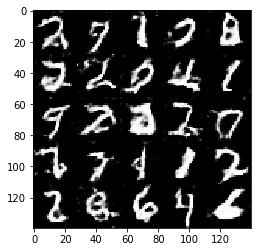

Epoch 2/2... Discriminator Loss: 0.8436... Generator Loss: 1.5335
Epoch 2/2... Discriminator Loss: 0.8168... Generator Loss: 1.8988
Epoch 2/2... Discriminator Loss: 0.9567... Generator Loss: 1.1995


In [20]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5295... Generator Loss: 3.1084
Epoch 1/1... Discriminator Loss: 0.7029... Generator Loss: 5.0356
Epoch 1/1... Discriminator Loss: 1.5573... Generator Loss: 4.4804
Epoch 1/1... Discriminator Loss: 0.7510... Generator Loss: 4.0136
Epoch 1/1... Discriminator Loss: 0.7986... Generator Loss: 1.6329
Epoch 1/1... Discriminator Loss: 0.5608... Generator Loss: 2.0594
Epoch 1/1... Discriminator Loss: 0.4347... Generator Loss: 3.1041
Epoch 1/1... Discriminator Loss: 0.3965... Generator Loss: 4.1045
Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 5.7094
Epoch 1/1... Discriminator Loss: 0.7974... Generator Loss: 1.2529


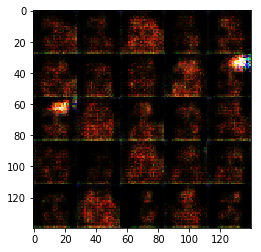

Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 1.0314
Epoch 1/1... Discriminator Loss: 1.7785... Generator Loss: 0.3929
Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 2.7410
Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 1.4909
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 2.4171
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.3502
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 2.1161... Generator Loss: 0.2484
Epoch 1/1... Discriminator Loss: 0.8255... Generator Loss: 1.8375
Epoch 1/1... Discriminator Loss: 0.6921... Generator Loss: 1.6976


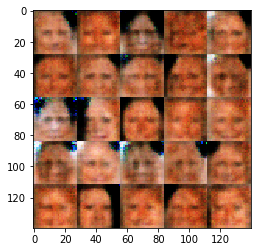

Epoch 1/1... Discriminator Loss: 0.8168... Generator Loss: 1.4342
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 3.3077
Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 1.1933
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.6020
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 1.5293
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.7431
Epoch 1/1... Discriminator Loss: 1.0777... Generator Loss: 1.1286
Epoch 1/1... Discriminator Loss: 0.9525... Generator Loss: 1.0949
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 2.2681
Epoch 1/1... Discriminator Loss: 0.9429... Generator Loss: 1.0321


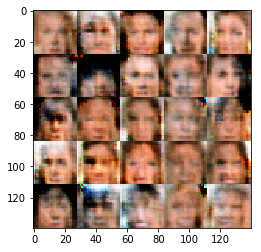

Epoch 1/1... Discriminator Loss: 1.7039... Generator Loss: 0.4089
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 1.6074
Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 1.9356
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 2.6217
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 0.9639
Epoch 1/1... Discriminator Loss: 1.9088... Generator Loss: 2.8521
Epoch 1/1... Discriminator Loss: 1.1315... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 2.1785


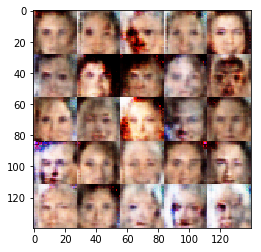

Epoch 1/1... Discriminator Loss: 1.0580... Generator Loss: 1.8674
Epoch 1/1... Discriminator Loss: 1.7181... Generator Loss: 2.5277
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 2.0861
Epoch 1/1... Discriminator Loss: 1.7560... Generator Loss: 2.5920
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.5838
Epoch 1/1... Discriminator Loss: 1.2300... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 1.1277
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 1.1839
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 2.2418
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 1.5618


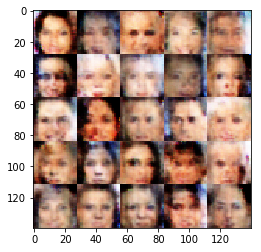

Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 1.0566
Epoch 1/1... Discriminator Loss: 1.2226... Generator Loss: 0.8650
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.0067
Epoch 1/1... Discriminator Loss: 1.2139... Generator Loss: 1.1254
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 1.7929
Epoch 1/1... Discriminator Loss: 1.1139... Generator Loss: 1.3253
Epoch 1/1... Discriminator Loss: 1.6512... Generator Loss: 2.8338
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 1.4886
Epoch 1/1... Discriminator Loss: 1.2071... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 0.7106


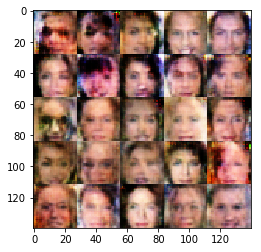

Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 1.5779
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 1.1590
Epoch 1/1... Discriminator Loss: 1.1701... Generator Loss: 1.5104
Epoch 1/1... Discriminator Loss: 1.1751... Generator Loss: 1.5703
Epoch 1/1... Discriminator Loss: 1.0503... Generator Loss: 1.0723
Epoch 1/1... Discriminator Loss: 1.1888... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.1037... Generator Loss: 0.9832
Epoch 1/1... Discriminator Loss: 0.9988... Generator Loss: 1.0368
Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.7339


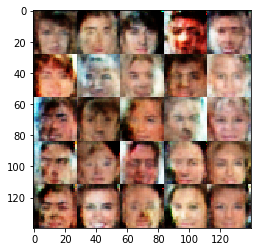

Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 1.1193
Epoch 1/1... Discriminator Loss: 1.0336... Generator Loss: 0.8475
Epoch 1/1... Discriminator Loss: 1.1371... Generator Loss: 1.0277
Epoch 1/1... Discriminator Loss: 1.2211... Generator Loss: 1.3489
Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 1.3399
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.5268
Epoch 1/1... Discriminator Loss: 1.6467... Generator Loss: 0.3702
Epoch 1/1... Discriminator Loss: 1.1937... Generator Loss: 0.8423
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 1.7473
Epoch 1/1... Discriminator Loss: 0.9852... Generator Loss: 1.0338


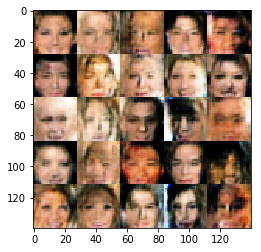

Epoch 1/1... Discriminator Loss: 1.1867... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 0.9712
Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 1.5774
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.5531
Epoch 1/1... Discriminator Loss: 1.2961... Generator Loss: 1.0300
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 1.4032
Epoch 1/1... Discriminator Loss: 1.6686... Generator Loss: 0.4516
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.6513


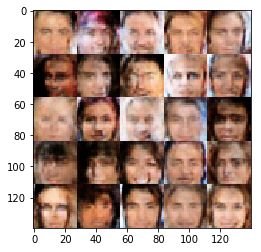

Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 0.8900... Generator Loss: 1.3178
Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 0.8912
Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 1.1928
Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 1.1671
Epoch 1/1... Discriminator Loss: 1.2132... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 1.1688
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.7073
Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 1.1784


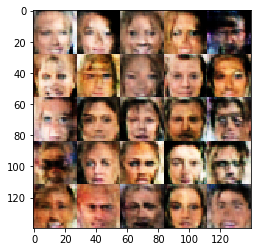

Epoch 1/1... Discriminator Loss: 1.1273... Generator Loss: 1.0598
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 1.2842
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 1.0353
Epoch 1/1... Discriminator Loss: 1.1475... Generator Loss: 1.0525
Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 1.0303
Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 2.2256
Epoch 1/1... Discriminator Loss: 1.1037... Generator Loss: 1.1994
Epoch 1/1... Discriminator Loss: 1.1838... Generator Loss: 1.2033
Epoch 1/1... Discriminator Loss: 1.1718... Generator Loss: 0.8564
Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 1.4013


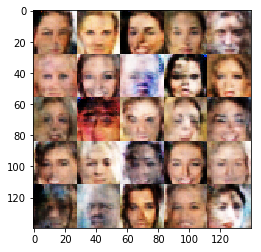

Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 1.6345
Epoch 1/1... Discriminator Loss: 0.6380... Generator Loss: 1.6595
Epoch 1/1... Discriminator Loss: 0.7070... Generator Loss: 1.8989
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 1.2351
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 0.9924
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 1.6695
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 1.0185
Epoch 1/1... Discriminator Loss: 0.7240... Generator Loss: 1.8333
Epoch 1/1... Discriminator Loss: 1.1530... Generator Loss: 1.5230
Epoch 1/1... Discriminator Loss: 1.4669... Generator Loss: 0.5135


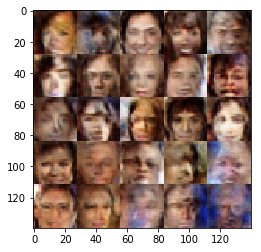

Epoch 1/1... Discriminator Loss: 1.1903... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.6141
Epoch 1/1... Discriminator Loss: 1.2245... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 1.0965... Generator Loss: 0.8909
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.5526
Epoch 1/1... Discriminator Loss: 1.1753... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 0.8209
Epoch 1/1... Discriminator Loss: 1.0931... Generator Loss: 1.2893


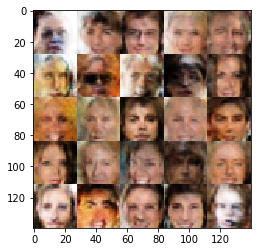

Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 1.7158
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 1.0353
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 1.9409
Epoch 1/1... Discriminator Loss: 0.9783... Generator Loss: 1.2957
Epoch 1/1... Discriminator Loss: 1.1701... Generator Loss: 1.1441
Epoch 1/1... Discriminator Loss: 1.3239... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.7751
Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 1.4263


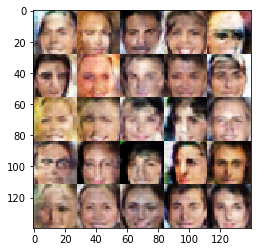

Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.9933
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.1443... Generator Loss: 0.8214
Epoch 1/1... Discriminator Loss: 1.5415... Generator Loss: 0.4668
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 1.2440
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.7848
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 1.3842
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.7323
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 1.4337
Epoch 1/1... Discriminator Loss: 1.0592... Generator Loss: 1.3444


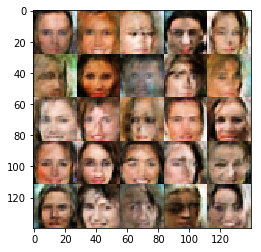

Epoch 1/1... Discriminator Loss: 1.1108... Generator Loss: 1.2019
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.9088
Epoch 1/1... Discriminator Loss: 1.0891... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 1.1791... Generator Loss: 1.2634
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 0.9411
Epoch 1/1... Discriminator Loss: 1.0533... Generator Loss: 1.2228
Epoch 1/1... Discriminator Loss: 1.1107... Generator Loss: 1.0783
Epoch 1/1... Discriminator Loss: 1.1412... Generator Loss: 0.8059


In [21]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.